<a href="https://colab.research.google.com/github/dilyara28/Sagdeeva-Dilyara/blob/main/Laba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving adelya.jpg to adelya.jpg
Saving alena.jpg to alena.jpg
Saving azaliya.jpg to azaliya.jpg
Saving danis.jpg to danis.jpg
Saving daria.jpg to daria.jpg
Saving dasha.jpg to dasha.jpg
Saving diana.jpg to diana.jpg
Saving dilyara.jpg to dilyara.jpg
Saving ilnur.jpg to ilnur.jpg
Saving irina.jpg to irina.jpg
Saving kate.jpg to kate.jpg
Saving madina.jpg to madina.jpg
Saving maria.jpg to maria.jpg
Saving masha.jpg to masha.jpg
Saving nastya.jpg to nastya.jpg
Saving olesya.jpg to olesya.jpg
Saving poline.jpg to poline.jpg


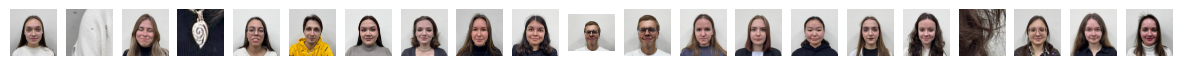

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Функция для извлечения фрагмента изображения
def extract_face_fragment(image):
    # Загружаем каскадный классификатор для обнаружения лиц
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Обнаруживаем лица
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    fragments = []

    for (x, y, w, h) in faces:
        # Вычисляем размеры фрагмента
        fragment_size = (w * 2, h * 2)

        # Определяем координаты фрагмента
        x_center = x + w // 2
        y_center = y + h // 2

        x_start = max(0, x_center - fragment_size[0] // 2)
        y_start = max(0, y_center - fragment_size[1] // 2)

        x_end = min(image.shape[1], x_center + fragment_size[0] // 2)
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2)

        # Извлекаем фрагмент
        fragment = image[y_start:y_end, x_start:x_end]
        fragments.append(fragment)

    return fragments

# Загружаем изображения
uploaded = files.upload()

# Список для хранения всех фрагментов
all_fragments = []

# Извлекаем фрагменты для каждого загруженного изображения
for filename in uploaded.keys():
    # Читаем изображение
    image = cv2.imread(filename)
    fragments = extract_face_fragment(image)
    all_fragments.extend(fragments)

# Отображаем фрагменты
plt.figure(figsize=(15, 10))
for i, fragment in enumerate(all_fragments):
    plt.subplot(1, len(all_fragments), i + 1)
    plt.imshow(cv2.cvtColor(fragment, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()


Saving adelya.jpg to adelya (1).jpg
Saving alena.jpg to alena (1).jpg
Saving azaliya.jpg to azaliya (1).jpg
Saving danis.jpg to danis (1).jpg
Saving daria.jpg to daria (1).jpg
Saving dasha.jpg to dasha (1).jpg
Saving diana.jpg to diana (1).jpg
Saving dilyara.jpg to dilyara (1).jpg
Saving ilnur.jpg to ilnur (1).jpg
Saving irina.jpg to irina (1).jpg
Saving kate.jpg to kate (1).jpg
Saving madina.jpg to madina (1).jpg
Saving maria.jpg to maria (1).jpg
Saving masha.jpg to masha (1).jpg
Saving nastya.jpg to nastya (1).jpg
Saving olesya.jpg to olesya (1).jpg
Saving poline.jpg to poline (1).jpg


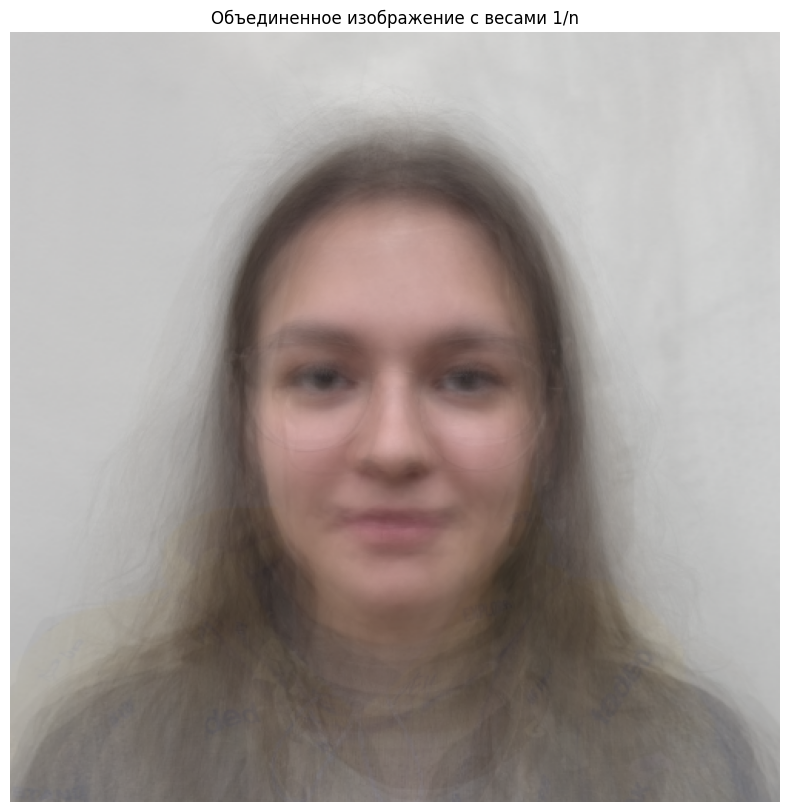

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Функция для извлечения фрагмента изображения
def extract_face_fragment(image):
    # Загружаем каскадный классификатор для обнаружения лиц
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Обнаруживаем лица
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    fragments = []

    for (x, y, w, h) in faces:
        # Вычисляем размеры фрагмента
        fragment_size = (w * 2, h * 2)

        # Определяем координаты фрагмента
        x_center = x + w // 2
        y_center = y + h // 2

        x_start = max(0, x_center - fragment_size[0] // 2)
        y_start = max(0, y_center - fragment_size[1] // 2)

        x_end = min(image.shape[1], x_center + fragment_size[0] // 2)
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2)

        # Извлекаем фрагмент
        fragment = image[y_start:y_end, x_start:x_end]
        fragments.append(fragment)

    return fragments

# Загружаем изображения
uploaded = files.upload()

# Список для хранения всех фрагментов
all_fragments = []

# Извлекаем фрагменты для каждого загруженного изображения
for filename in uploaded.keys():
    # Читаем изображение
    image = cv2.imread(filename)
    fragments = extract_face_fragment(image)
    all_fragments.extend(fragments)

# Изменяем размеры фрагментов, чтобы они совпадали
target_size = (500, 500)  # Задайте желаемый размер (ширина, высота)
resized_fragments = [cv2.resize(fragment, target_size) for fragment in all_fragments]

# Сложение всех изображений с весом 1/n
n = len(resized_fragments)
combined_image = np.zeros_like(resized_fragments[0], dtype=np.float32)  # Создаем пустое изображение для сложения

for fragment in resized_fragments:
  combined_image += fragment / n  # Сложение с учетом веса

combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)  # Приведение значений к диапазону [0, 255]

# Отображаем объединенное изображение
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Объединенное изображение с весами 1/n")
plt.show()